<a href="https://colab.research.google.com/github/amirmafzali/Machine-learning_course/blob/main/HW2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt 
import cv2
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from keras import regularizers

In [17]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
W_grid = 3
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,30))

for i in range(10):
  classes = np.random.randint(len(x_train),size=1)

  for j in classes :
    im32 = cv2.resize(x_train[j],(32,32))
    axes[i,0].imshow(im32)
    im16 = cv2.resize(x_train[j],(16,16))
    axes[i,1].imshow(im16)
    im8 = cv2.resize(x_train[j],(8,8))
    axes[i,2].imshow(im8)


In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
    )

datagen.fit(x_train)

In [19]:
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")

mean=np.mean(x_train)
std=np.std(x_train)

x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [20]:
IMG_SIZE_train = 32

new_train = []
for i in range(0,len(x_train)):
  img = cv2.resize(x_train[i],(IMG_SIZE_train,IMG_SIZE_train))
  new_train.append(img)
x_train = np.array(new_train)

In [21]:
IMG_SIZE_test = 8

new_test = []
for i in range(0,len(x_test)):
  img = cv2.resize(x_test[i],(IMG_SIZE_test,IMG_SIZE_test))
  new_test.append(img)
x_test = np.array(new_test)


IMG_SIZE_test2 = 32

new_test = []
for i in range(0,len(x_test)):
  img = cv2.resize(x_test[i],(IMG_SIZE_test2,IMG_SIZE_test2))
  new_test.append(img)
x_test = np.array(new_test)

In [22]:
num_classes=10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
model=keras.models.Sequential([
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
                        activation='relu', input_shape=x_train.shape[1:],
                        padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(10,activation='softmax')  

])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

In [24]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(lr=0.001),
    metrics=['accuracy']    
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                  steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


390/390 [==============================] - 28s 69ms/step - loss: 2.6439 - accuracy: 0.3439 - val_loss: 3.2016 - val_accuracy: 0.2123
Epoch 2/100
390/390 [==============================] - 28s 71ms/step - loss: 1.5956 - accuracy: 0.4742 - val_loss: 2.4303 - val_accuracy: 0.2836
Epoch 3/100
390/390 [==============================] - 26s 67ms/step - loss: 1.4351 - accuracy: 0.5352 - val_loss: 2.5376 - val_accuracy: 0.2875
Epoch 4/100
390/390 [==============================] - 28s 71ms/step - loss: 1.3218 - accuracy: 0.5780 - val_loss: 2.8962 - val_accuracy: 0.2726
Epoch 5/100
390/390 [==============================] - 27s 69ms/step - loss: 1.2380 - accuracy: 0.6131 - val_loss: 2.7156 - val_accuracy: 0.2577
Epoch 6/100
390/390 [==============================] - 28s 71ms/step - loss: 1.1665 - accuracy: 0.6432 - val_loss: 2.6346 - val_accuracy: 0.2568
Epoch 7/100
390/390 [==============================] - 27s 68ms/step - loss: 1.1156 - accuracy: 0.6633 - val_loss: 2.4252 - val_accuracy: 0.27

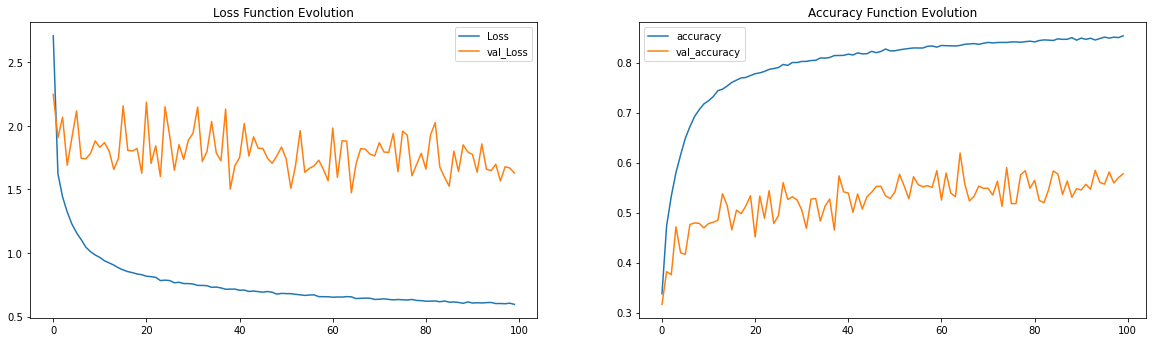

In [15]:
plt.figure(figsize=(20,25))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [16]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('\naccuracy = ',accuracy_score(y_test_arg, Y_pred),"\n")
print('recall = ',recall_score(y_test_arg, Y_pred,average='macro'),'\n')
print('f1 = ',f1_score(y_test_arg, Y_pred,average='macro'),'\n')
print('precision = ',precision_score(y_test_arg, Y_pred,average='macro'))

313/313 [==============================] - 1s 3ms/step

accuracy =  0.5775 

recall =  0.5774999999999999 

f1 =  0.5877450091969032 

precision =  0.6980793291871195


313/313 [==============================] - 1s 3ms/step


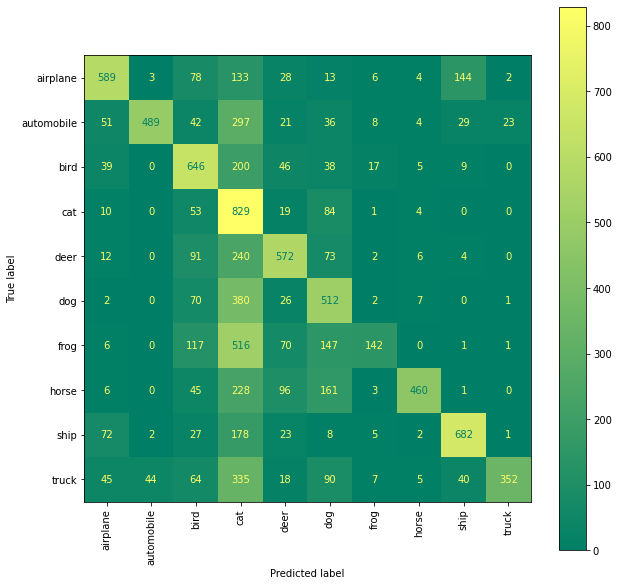

In [27]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()